# Business Case: Netflix - Data Exploration and Visualisation

# 1. Introduction 

## 🎯 Objective

Analyzing the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

## 📚 About Data

This tabular dataset consists of data as of `mid-2021`, about `8807` movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. The data is available in a single csv file 


## 📃 Features of the dataset:


| Feature | Description |
|:--------|:------------|
| Show ID | The ID of the show |
| Type | Identifier - A Movie or TV Show |
| Title | Title of the Movie / Tv Show |
| Director | Director of the Movie |
| Cast | Actors involved in the movie/show |
| Country | Country where the movie/show was produced |
| Date_added | Date it was added on Netflix | 
| Release_year | Actual Release year of the movie/show | 
| Rating | TV Rating of the movie/show | 
| Duration | Total Duration - in minutes or number of seasons | 
| Listed_in | Genre | 
| Description | The summary description | The summary description |


# 2. Exploratory Data Analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import copy
from wordcloud import WordCloud

In [14]:
df = pd.read_csv("netflix_case_study.csv")

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


These are the first 5 rows of the dataset. The actual size of the dataset is given below. total 8807 rows and 12 columns.

In [17]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [18]:
df.shape

(8807, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Insights
From the above analysis, it is clear that, data has total of 12 features with lots of mixed alpha numeric data. Also we can see missing data in 5 of the total columns.

These are the total features of the dataset. From the above code we can see that show_id column has all unique values, tTitle column has all unique values i.e. total 8807 which equates with total rows in the dataset. Hence we can conclude that there are 8807 Movies/TV Shows in the given Dataset.set.

## Statistical Summary

In [23]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [24]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Insights
**1. Type of content** - Among the 8807 items available on Netflix, 6131 of them are movies, accounting for nearly `70%` of the total content. The remaining `30%` consists of TV series.

**2. Director** - `Rajiv Chilaka` holds the top position on the director list, with `19 credits` to his name. He specializes in creating animated movies for children.

**3. Cast** - `David Attenborough` leads the actor list with 19 appearances in various films and shows on Netflix.

**4. Country** - The `USA` ranks at the top as the country with the highest production contribution to Netflix, accounting for `35%` of the total content.

**5. Date Added** - `January 1, 2020`, stands out as the peak date for content uploads on Netflix. On that day alone, approximately `109` different shows and movies were added to the platform.

**6. Ratings** - There are 17 different types of ratings present on Netflix. The `"TV-MA"` (Mature Audience Only) rating dominates the charts, covering almost `36%` of the total shows and movies on the platform with this rating.

## Duplicate Detection

In [27]:
df.duplicated().value_counts()

False    8807
Name: count, dtype: int64

### Insights
- There are no duplicate entries in the dataset

## Sanity Check for columns

In [30]:
# checking the unique values for columns
for i in ['type','release_year','rating','duration']:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in type column are :-
['Movie' 'TV Show']
----------------------------------------------------------------------
Unique Values in release_year column are :-
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
----------------------------------------------------------------------
Unique Values in rating column are :-
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
----------------------------------------------------------------------
Unique Values in duration column are :-
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 m

In [31]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Value count in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Value count in type column are :-
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in release_year column are :-
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64
----------------------------------------------------------------------
Value count in rating column are :-
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in duration column are :-
duration
1 Season     1793
2 Seasons     425
3 Seasons    

###  Insights
- Therearef `3 unusual` values in `rating` column. We will replace them by NaN as below - 

In [33]:
df['rating'].replace({'74 min':np.nan ,'84 min' : np.nan, '66 min' : np.nan},inplace = True)

## Missing Values Analysis

Overall null values in each column of the dataset

In [36]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           3
listed_in          0
description        0
dtype: int64

In [37]:
# percentage of nullity
for i in df.columns:
    null_rate = df[i].isnull().sum()/df.shape[0] * 100 
    if null_rate > 0:
        print(f"{i}'s null rate : {round(null_rate,2)}%")

director's null rate : 29.91%
cast's null rate : 9.37%
country's null rate : 9.44%
date_added's null rate : 0.11%
rating's null rate : 0.08%
duration's null rate : 0.03%


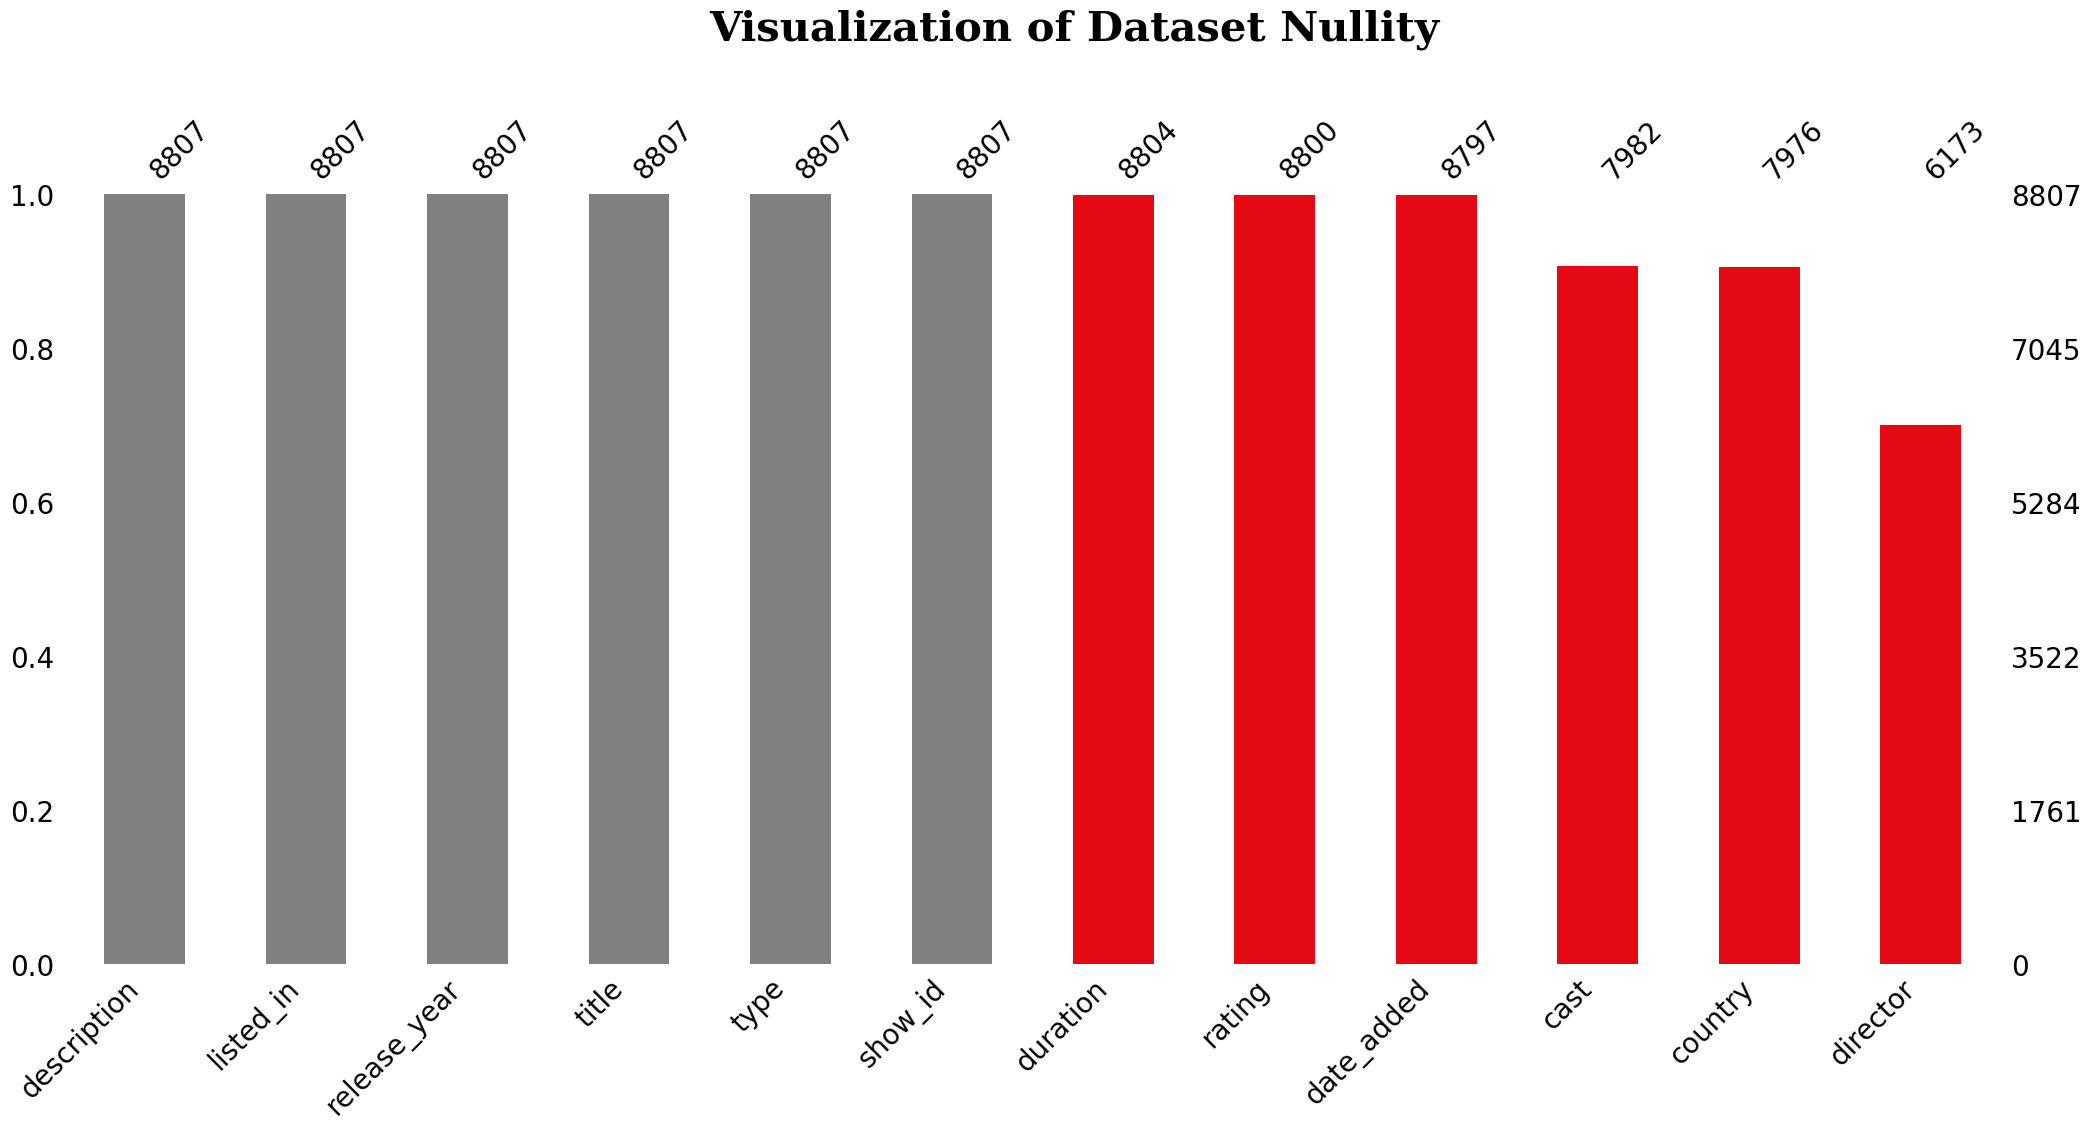

In [38]:
# missing value visualisation
color = ['grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914','#E50914','#E50914']
ax = msno.bar(df,sort = 'descending',color = color,fontsize = 20)
ax.text(3.5,1.2,'Visualization of Dataset Nullity',{'font':'serif', 'color':'black','weight':'bold','size':30})
plt.show()

###  Insights
 From our above analysis, there are total of `6 columns` containing missing values. `Director's` column has the most missing values followed by `cast` and `country` column. `Date added, ratings and duration` have significantly less missing values (<1%)

##  Replacing the missing values

In [41]:
df['director'].fillna('Unknown Director',inplace = True)
df['cast'].fillna('Unknown cast',inplace = True)
df['country'].fillna('Unknown country',inplace = True)

date = {"A Young Doctor's Notebook and Other Stories" : 'September 15, 2014',
       "Anthony Bourdain: Parts Unknown" : 'June 1, 2020',
        "Frasier" : 'April 1, 2015',
        "Friends" : 'January 1, 2015',
        "Gunslinger Girl" : 'January 4, 2016',
        "Kikoriki" : 'July 6, 2017',
        "La Familia P. Luche" : 'June 1, 2015',
        "Maron" : 'November 2, 2018',
        "Red vs. Blue" : 'March 21, 2015',
        "The Adventures of Figaro Pho": 'January 1, 2016'}

for i in date :
    df.loc[df['title'] == i, 'date_added'] = date[i]

ratings = {"13TH: A Conversation with Oprah Winfrey & Ava DuVernay" : 'TV-PG',
         "Gargantia on the Verdurous Planet" : 'TV-PG',
          "Little Lunch" : 'TV-Y',
          "My Honor Was Loyalty" : 'PG-13',
          "Louis C.K. 2017" : 'TV-MA',
          "Louis C.K.: Hilarious" : 'TV-MA',
          "Louis C.K.: Live at the Comedy Store":'TV-MA'}

for i in ratings:
    df.loc[df['title'] == i,'rating'] = ratings[i]
    
durn = {"Louis C.K. 2017" : '74 min',
          "Louis C.K.: Hilarious" : '83 min',
          "Louis C.K.: Live at the Comedy Store":'65 min'}

for i in durn:
    df.loc[df['title'] == i,'duration'] = durn[i]

* For columns such as Date Added, Rating, and Duration. Since, they had only a few missing values the details about them were
  found on google and were added in the above code.

In [43]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##  Adding new columns for better analysis

In [45]:
# converting date_added to datetime column
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added']) 

#adding new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,38


##  Un-nesting the columns for better analysis

- We will create a **new df** which has un-nested director,cast and country columns into multiple rows which will help while doing analysis related to them.

In [47]:
# creating a separate table
df1 = copy.deepcopy(df)


df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")

df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38


In [48]:
df1.shape

(89382, 15)

# 3. Data Visualisation

## Content Distribution    

In [51]:
x = df['type'].value_counts()
x

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

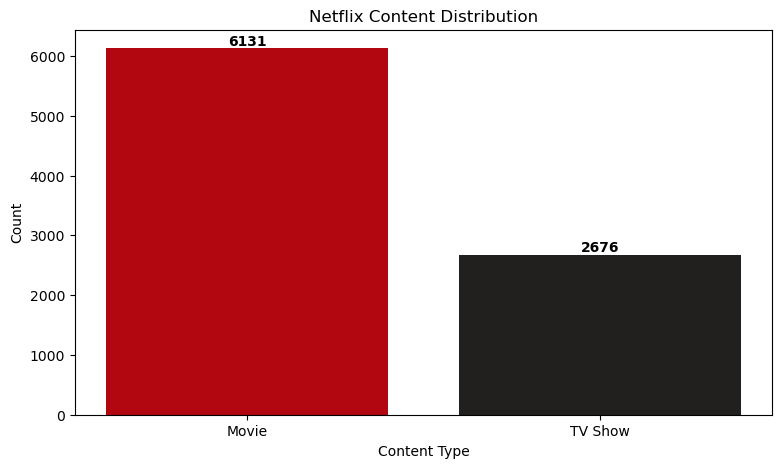

In [52]:
plt.figure(figsize=(9,5))
plt.bar(x.index, x.values, color=['#b20710', '#221f1f'])

plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Netflix Content Distribution")

for i, v in enumerate(x.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold', color='black')

plt.show()

###  Insights
* Out of all the content given in the dataset there are about 6131 movies which is about 70% of the total dataset. Meanwhile,
  there are 2676 TV Shows which accounts for about 30% of the total content.
* Netflix predominantly focuses on producing higher quantity of Movies rather than TV Shows.

## Evolution of Netflix's Growing Library of Movies & TV Shows

* Analysis of number of Movies and TV shows added over time on Netflix

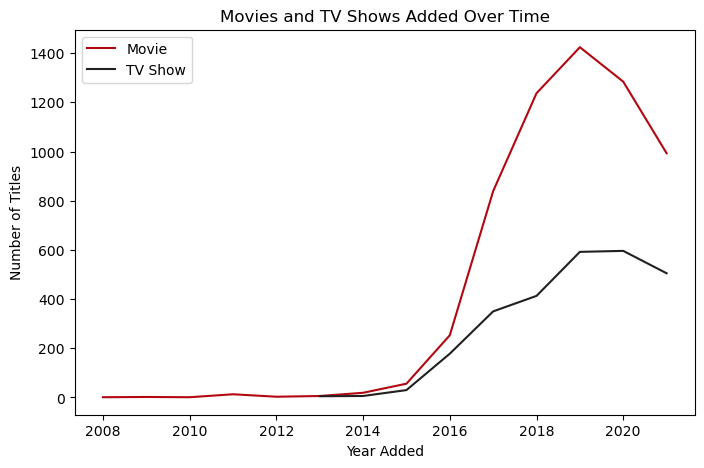

In [56]:
yearly_counts = df.groupby(['year_added', 'type']).size().unstack()

plt.figure(figsize=(8,5))
plt.plot(yearly_counts.index, yearly_counts['Movie'], label='Movie', color='#b20710')
plt.plot(yearly_counts.index, yearly_counts['TV Show'], label='TV Show', color='#221f1f')

plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.title("Movies and TV Shows Added Over Time")

plt.legend()

plt.show()

###  Insights
* We see a slow start for Netflix over several years. Things begin to pick up in 2015 and then there is a rapid increase from 2016.
* As we saw in the timeline at the start of this analysis, Netflix went global in 2016 - and it is extremely noticeable in this plot.
* The rate of content additions decelerated in 2020, possibly attributed to the impact of the COVID-19 pandemic. 

## Directors with the Most Appearances

* Top 10 directors who have appeared in most movies or TV shows.

In [60]:
d_cnt = df1.groupby('director')['title'].nunique().sort_values(ascending = False)[0:11].reset_index()
d_cnt

,director,title
0,Unknown Director,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


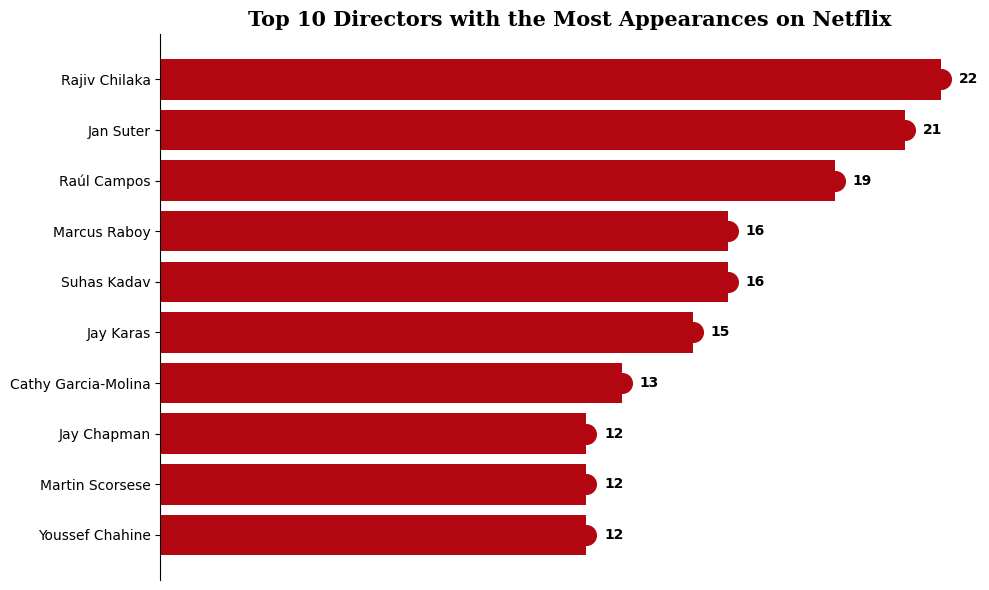

In [61]:
# Dropping the 'Unknown Director' row 
d_cnt = d_cnt[d_cnt['director'].notna()]  
d_cnt = d_cnt[d_cnt['director'].str.lower() != 'unknown director']  

d_cnt = d_cnt.sort_values('title', ascending=False).head(10)
d_cnt = d_cnt.iloc[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(d_cnt['director'], d_cnt['title'], color='#b20710')
ax.scatter(d_cnt['title'], d_cnt['director'], s=200, color='#b20710')

for y, x in zip(d_cnt['director'], d_cnt['title']):
    ax.text(x + 0.5, y, str(x), fontsize=10, fontweight='bold', va='center')
    
ax.set_xticks([])
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

ax.set_title('Top 10 Directors with the Most Appearances on Netflix',
             fontdict={'family':'serif', 'size':15, 'weight':'bold'})

plt.tight_layout()
plt.show()

## Actor's with the Most Appearances

* Top 10 Actor's who have appeared in most movies or TV shows.

In [64]:
a_cnt = df1.groupby('cast')['title'].nunique().sort_values(ascending = False)[0:11].reset_index()
a_cnt

,cast,title
0,Unknown cast,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29


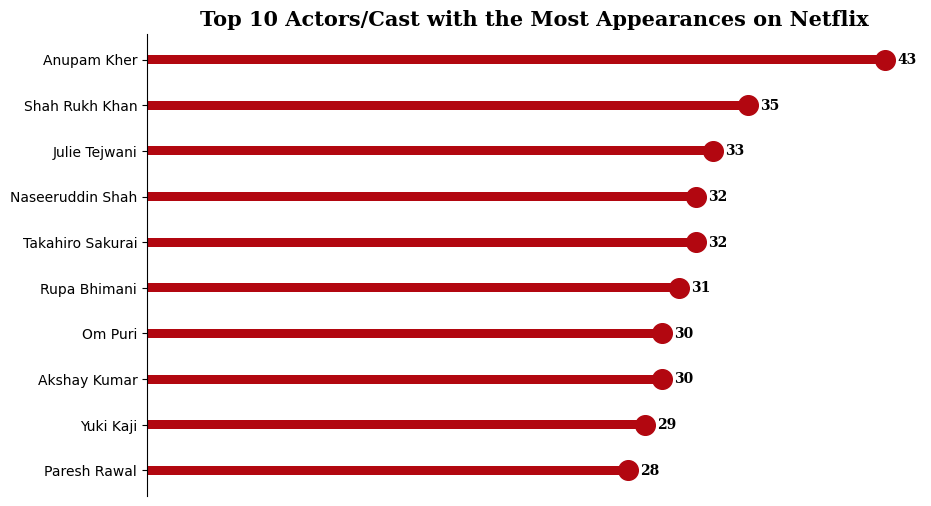

In [65]:
# droping unknown actor and reversing the list
a_cnt = a_cnt.iloc[-1:-11:-1]

fig,ax = plt.subplots(figsize = (10,6))

ax.barh(y = a_cnt['cast'],width = a_cnt['title'],height = 0.2,color = '#b20710')
ax.scatter(y = a_cnt['cast'], x = a_cnt['title'] , s = 200 , color = '#b20710' )

ax.set_xticks([])

for y,x in zip(a_cnt['cast'],a_cnt['title']):
 ax.text( x + 0.7 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

for s in ['top','bottom','right']:
 ax.spines[s].set_visible(False)

ax.set_title('Top 10 Actors/Cast with the Most Appearances on Netflix',
 {'font':'serif', 'size':15,'weight':'bold'})
plt.show()

###  Insights

* Significantly, 8 out of the top 10 Actors/Cast with the highest number of appearances on Netflix are of Indian origin . 

## Global Streaming Sensations

* Top 10 Countries which have produced the most Movies and most TV Shows on Netflix.

In [69]:
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

df_movie = df_movie.drop(3)

df_movie['country'] = df_movie['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_movie

,country,title
0,USA,2751
1,India,962
2,UK,532
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


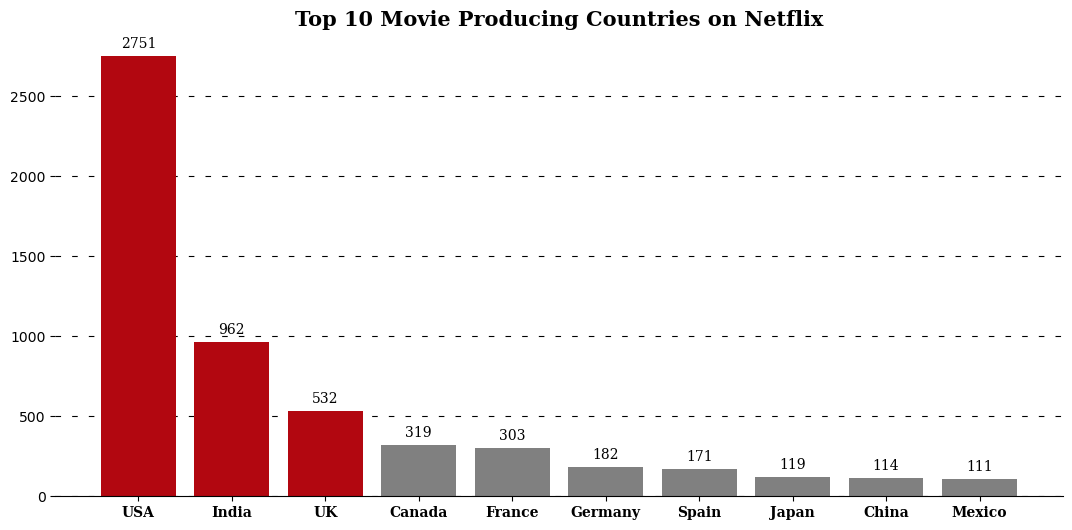

In [70]:
fig, ax = plt.subplots(figsize=(13, 6))

colors = ['grey'] * 10
colors[0:3] = ['#b20710'] * 3  

ax.bar(df_movie['country'], df_movie['title'], color=colors, zorder=2)

# Adding value labels above each bar
for i in df_movie.index:
    ax.text(df_movie.loc[i, 'country'],               
            df_movie.loc[i, 'title'] + 75,   
            df_movie.loc[i, 'title'], 
            fontfamily='serif', fontsize=10, ha='center', va='center')

ax.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

ax.set_xticklabels(df_movie['country'], fontweight='bold', fontfamily='serif')

for side in ['top', 'left', 'right']:
    ax.spines[side].set_visible(False)

ax.set_title('Top 10 Movie Producing Countries on Netflix',
             fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()

In [71]:
df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

df_tv = df_tv.drop(1)

df_tv['country'] = df_tv['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_tv

,country,title
0,USA,938
2,UK,272
3,Japan,199
4,S korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66
10,Spain,61


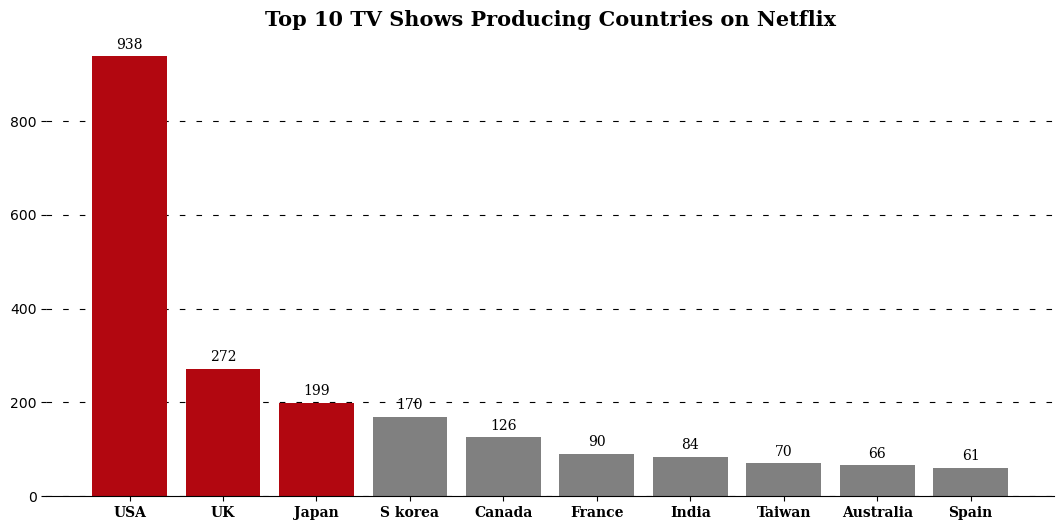

In [72]:
fig, ax = plt.subplots(figsize=(13, 6))

colors = ['grey'] * 10
colors[0:3] = ['#b20710'] * 3 

ax.bar(df_tv['country'], df_tv['title'], color=colors, zorder=2)

# Adding text labels above each bar
for i in df_tv.index:
    ax.text(df_tv.loc[i, 'country'],                
            df_tv.loc[i, 'title'] + 25,             
            df_tv.loc[i, 'title'],                  
            fontfamily='serif', fontsize=10, ha='center', va='center')

ax.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

ax.set_xticks(range(len(df_tv['country'])))
ax.set_xticklabels(df_tv['country'], fontweight='bold', fontfamily='serif')

for side in ['top', 'left', 'right']:
    ax.spines[side].set_visible(False)

ax.set_title('Top 10 TV Shows Producing Countries on Netflix',
             fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()

### Insights

**1. Content Investment Strategy** 
- Netflix heavily invests in content production in the USA, its home country, to attract and retain subscribers.  India, being the second on the list, signifies Netflix's strategic focus on the Indian market due to its significant population and growing demand for streaming services. 

**2. Global Expansion** 
- The presence of shows from various countries, such as UK, Canada, France, Japan,etc. highlights Netflix's effort to cater to a diverse global audience.This also enables Netflix to provide content that resonates with the cultural and linguistic preferences of different regions.

**3. TV Shows Vs Movies**
- Indian's prefer to watch movies over TV shows, on contrary South koreans perfer Tv shows over movies.vies. 

## Content Split

* Content split for Top 10 Countries which have produced the most Movies and most TV Shows on Netflix.

In [76]:
c_cnt = df1.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]
c_cnt = c_cnt.drop(2) #dropping unknown country column

c_cnt['country'] = c_cnt['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
c_cnt

,country,title
0,USA,3689
1,India,1046
3,UK,804
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,S korea,231
9,Germany,226
10,Mexico,169


In [77]:
df_merge = pd.merge(c_cnt, df_movie, on='country', how='left')
df_merge = pd.merge(df_merge, df_tv, on='country', how='left')

df_merge.rename(columns={
    'title_x': 'Total_Count',
    'title_y': 'Movie_Count',
    'title': 'TV_Show_Count'
}, inplace=True)

# Filling the missing values using Total_Count
df_merge['Movie_Count'].fillna(df_merge['Total_Count'] - df_merge['TV_Show_Count'], inplace=True)
df_merge['TV_Show_Count'].fillna(df_merge['Total_Count'] - df_merge['Movie_Count'], inplace=True)

df_merge['Movie%'] = round((df_merge['Movie_Count'] / df_merge['Total_Count']) * 100)
df_merge['TV%'] = round((df_merge['TV_Show_Count'] / df_merge['Total_Count']) * 100)

for col in df_merge.columns[1:]:
    df_merge[col] = df_merge[col].astype(int)

df_merge = df_merge.sort_values(by='Movie%')

df_merge

,country,Total_Count,Movie_Count,TV_Show_Count,Movie%,TV%
7,S korea,231,61,170,26,74
5,Japan,318,119,199,37,63
2,UK,804,532,272,66,34
9,Mexico,169,111,58,66,34
3,Canada,445,319,126,72,28
6,Spain,232,171,61,74,26
0,USA,3689,2751,938,75,25
4,France,393,303,90,77,23
8,Germany,226,182,44,81,19
1,India,1046,962,84,92,8


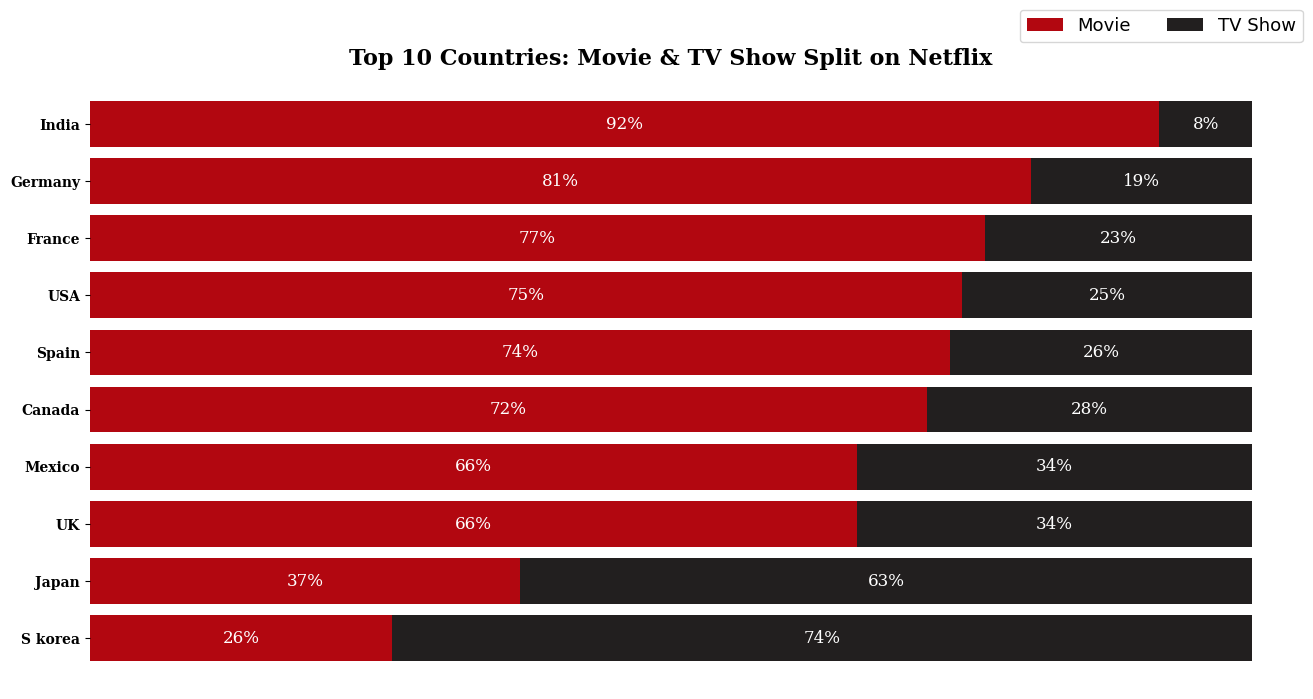

In [78]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.barh(
    df_merge['country'], 
    width=df_merge['Movie%'], 
    color='#b20710', 
    label='Movie'
)
ax.barh(
    df_merge['country'], 
    width=df_merge['TV%'], 
    left=df_merge['Movie%'],  
    color='#221f1f', 
    label='TV Show'
)

ax.set(xlim=(0, 100))

ax.set_xticks([])
ax.set_yticklabels(df_merge['country'], fontweight='bold', fontfamily='serif')

for i in df_merge.index:
    # Movie percentage text 
    ax.text(
        df_merge.loc[i, 'Movie%'] / 2, 
        df_merge.loc[i, 'country'], 
        f"{df_merge.loc[i, 'Movie%']}%", 
        va='center', ha='center',
        fontsize=12, fontfamily='serif', color='white'
    )
    # TV Show percentage text 
    ax.text(
        df_merge.loc[i, 'Movie%'] + df_merge.loc[i, 'TV%'] / 2, 
        df_merge.loc[i, 'country'], 
        f"{df_merge.loc[i, 'TV%']}%", 
        va='center', ha='center',
        fontsize=12, fontfamily='serif', color='white'
    )

for side in ['top', 'left', 'right', 'bottom']:
    ax.spines[side].set_visible(False)

ax.set_title(
    'Top 10 Countries: Movie & TV Show Split on Netflix',
    fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'}
)

ax.legend(['Movie','TV Show'], loc=(0.80, 1.05), ncol=2, fontsize=13)

plt.show()

### Insights 

* TV shows are more popular than movies in Asian countries , especially South Korea and Japan, where they account for more than 60% of the content.
* Movies are more popular than TV shows in European countries ,where they account for more than 65% of the content.
* India has the highest percentage of movies (92%) among all the countries, which may indicate a high demand for movies.
* North American countries have similar movie percentages (around 70%) and similar TV show percentages (around 30%) as each other,suggesting a similar
  preference or taste among these markets.

## Best Month to launch a TV show/Movie

In [81]:
month = df.groupby('month_added')['type'].value_counts()
month.name = 'count' 
month = month.reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['month_added'] = pd.Categorical(month['month_added'], categories=months, ordered=True)
month.head()

,month_added,type,count
0,April,Movie,550
1,April,TV Show,215
2,August,Movie,519
3,August,TV Show,236
4,December,Movie,547


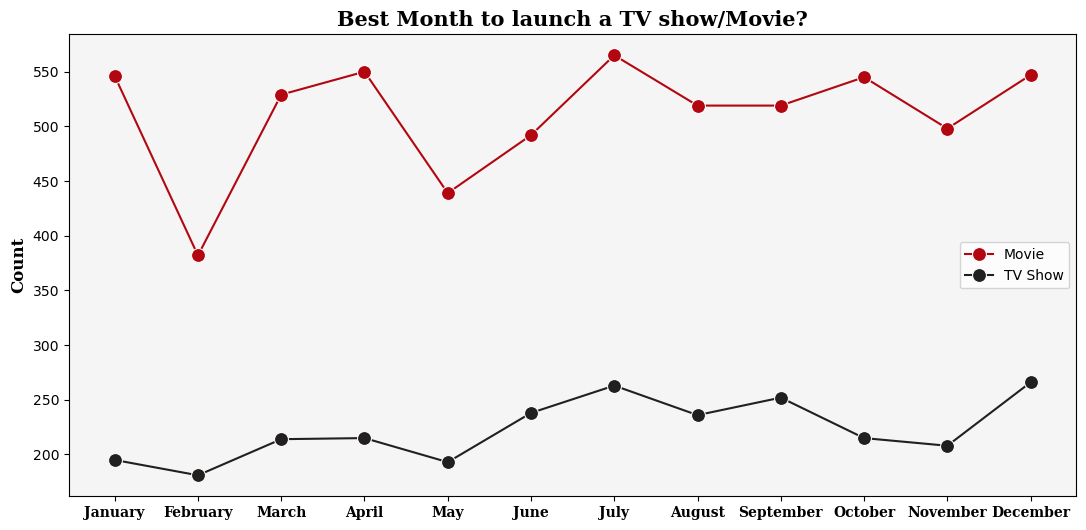

In [82]:
month_movie_data = month.loc[month['type'] == 'Movie'].sort_values(by='month_added')

month_tv_data = month.loc[month['type'] == 'TV Show'].sort_values(by='month_added')

fig, ax = plt.subplots(figsize=(13, 6))

ax.set_facecolor('#f6f5f5')

sns.lineplot(
    data=month_movie_data,  
    x='month_added',        
    y='count',              
    marker='o',            
    markersize=10,
    color='#b20710',        
    label='Movie',          
    ax=ax                   
)

sns.lineplot(
    data=month_tv_data,
    x='month_added',
    y='count',
    marker='o',
    markersize=10,
    color='#221f1f',        
    label='TV Show',
    ax=ax
)

ax.set_xticklabels(month_movie_data['month_added'], fontweight='bold', fontfamily='serif')

plt.xlabel(None)

plt.ylabel('Count', fontweight='bold', fontfamily='serif', fontsize=12)

plt.legend(loc='center right')

ax.set_title(
    'Best Month to launch a TV show/Movie?',
    fontdict={'fontfamily': 'serif', 'size': 15, 'weight': 'bold'}
)

plt.show()

### Insights

**1. Consistent Patterns** 
- The monthly upload count of both Movies and TV shows exhibits y `similar trend.`

**2. Seasonal Fluctuations** 
- There is a notable correlation between **content uploads and holiday seasons**, with **January and December** witnessing significant spikes in content additions.
- The months of **July, August, October, and December** record **higher content** upload counts, whereas **February, May, and November** experience comparatively **lower counts**.
- They may choose to focus on certain months or seasons to release high content and schedule fewer releases based on **information about historical viewer preferences and behavior**.

## Exploring Netflix Content Ratings

* Rating distribution for Movies and TV shows on Netflix

In [86]:
movie_rating = df.loc[df['type'] == 'Movie','rating'].value_counts().reset_index()
tv_rating = df.loc[df['type'] == 'TV Show','rating'].value_counts().reset_index()

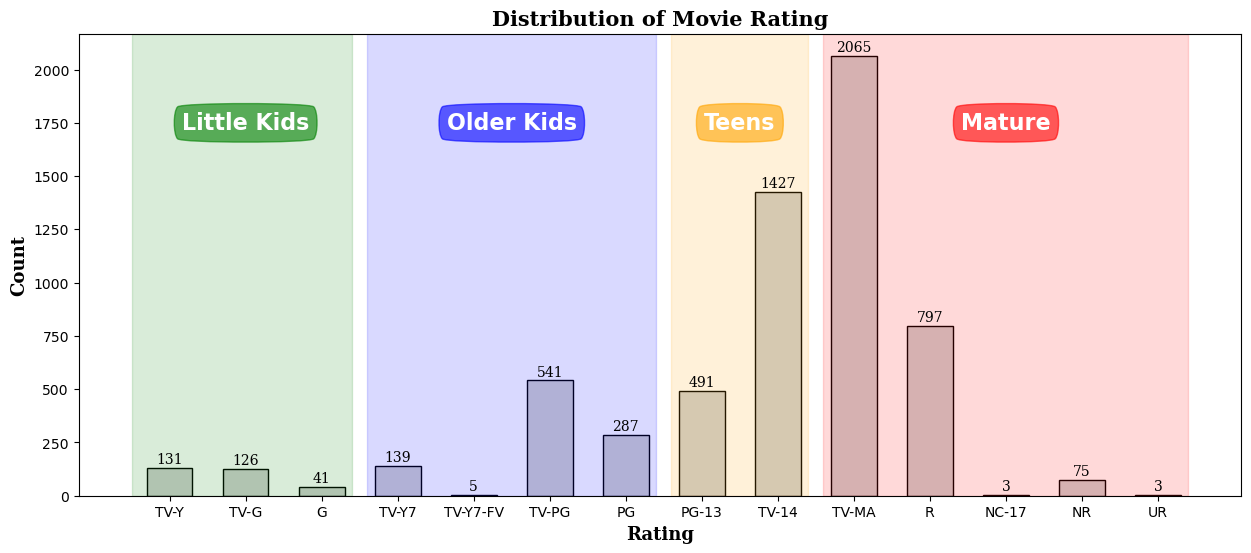

In [87]:
fig, ax = plt.subplots(figsize=(15, 6))

rating_order = ['TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG', 'PG-13', 'TV-14', 'TV-MA', 'R', 'NC-17', 'NR', 'UR']

x_positions = range(len(rating_order))

for idx, rating in enumerate(rating_order):
    rating_data = movie_rating[movie_rating['rating'] == rating]
    if not rating_data.empty:
        count = rating_data['count'].iloc[0]
        ax.bar(idx, count, color='#d0d0d0', edgecolor='black', width=0.6)

ax.set_xlabel('Rating', fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_ylabel('Count', fontweight='bold', fontfamily='serif', fontsize=13)

ax.set_xticks(x_positions)
ax.set_xticklabels(rating_order)

for idx, rating in enumerate(rating_order):
    rating_data = movie_rating[movie_rating['rating'] == rating]
    if not rating_data.empty:
        count = rating_data['count'].iloc[0]
        ax.text(idx, count + 40, int(count), {'font': 'serif', 'size': 10}, ha='center', va='center')

color = ['green', 'blue', 'orange', 'red']
span_range1 = [[-0.5, 2.4], [2.6, 6.4], [6.6, 8.4], [8.6, 13.4]]
span_range2 = [[0, 2], [3, 6], [7, 8], [9, 13]]

for idx, title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
    ax.axvspan(span_range1[idx][0], span_range1[idx][1], color=color[idx], alpha=0.15)
    ax.annotate(title, xy=(sum(span_range2[idx])/2, 1750), va="center", ha="center", 
                color="w", fontsize=16, fontweight='bold', 
                bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))

ax.set_title('Distribution of Movie Rating', {'font': 'serif', 'size': 15, 'weight': 'bold'})
plt.show()

### Insights

- The majority of the movies and TV shows available on Netflix cater to adult audiences, followed by teenagers, older children, and then younger children.


- The distribution of content across different age groups on Netflix reflects a strategic approach to catering to a diverse audience and the focus on Adult and teens indicates the focus of Netflix on significant purchasing power of this age group

##  Target Audience

- **`Target Audience distribution`** for Movies and TV shows on Netflix

In [91]:
def age_group(x):
    if x in ['TV-Y', 'TV-G', 'G']:
        return 'Little Kids'
    elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
        return 'Older Kids'
    elif x in ['PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'

# Use 'rating' column instead of 'index'
movie_rating['age'] = movie_rating['rating'].apply(lambda x: age_group(x))
age_m_rating = movie_rating.groupby('age')['count'].sum().sort_values(ascending=False).reset_index()

tv_rating['age'] = tv_rating['rating'].apply(lambda x: age_group(x))
age_t_rating = tv_rating.groupby('age')['count'].sum().sort_values(ascending=False).reset_index()

print("Movie Rating by Age Group:")
print(age_m_rating)
print("\nTV Rating by Age Group:")
print(age_t_rating)

Movie Rating by Age Group:
           age  count
0       Adults   2943
1        Teens   1918
2   Older Kids    972
3  Little Kids    298

TV Rating by Age Group:
           age  count
0       Adults   1152
1        Teens    733
2   Older Kids    520
3  Little Kids    271


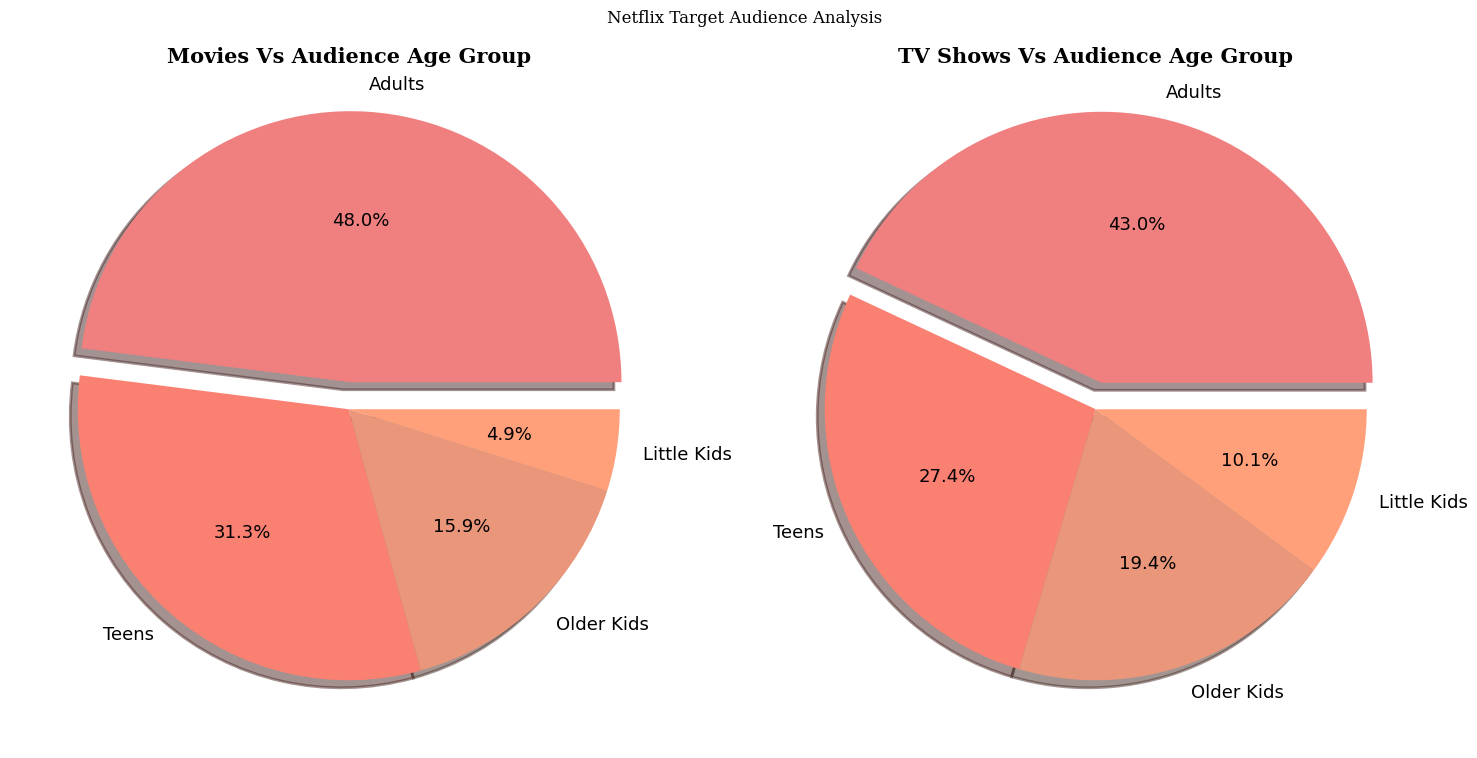

In [97]:
fig = plt.figure(figsize = (15, 8))
gs = fig.add_gridspec(1, 2)

color_map = ['LightCoral', 'Salmon', 'DarkSalmon', 'LightSalmon']

ax0 = fig.add_subplot(gs[0, 0])

ax0.pie(
    age_m_rating['count'],  
    labels=age_m_rating['age'],  
    autopct='%.1f%%',  
    shadow=True,
    colors=color_map,
    explode=[0.1, 0, 0, 0],  
    wedgeprops={'linewidth': 2}, 
    textprops={'fontsize': 13, 'color': 'black'}  
)

ax0.set_title(
    'Movies Vs Audience Age Group',
    fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'}
)

ax1 = fig.add_subplot(gs[0, 1])

ax1.pie(
    age_t_rating['count'],
    labels=age_t_rating['age'],
    autopct='%.1f%%',
    shadow=True,
    colors=color_map,
    explode=[0.1, 0, 0, 0],
    wedgeprops={'linewidth': 2},
    textprops={'fontsize': 13, 'color': 'black'}
)

ax1.set_title(
    'TV Shows Vs Audience Age Group',
    fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'}
)

fig.suptitle(
    'Netflix Target Audience Analysis',
    fontdict={'family': 'serif', 'size': 17, 'weight': 'bold'}
)

plt.tight_layout()
plt.show()

###  Insights

**1. Movies** 

- Roughly half of the films available on the platform cater to adult audiences, while around 30% of the overall content is designed for teenagers, and the remaining 20% is tailored for children

**2. TV Shows** 

- The pattern holds true for television shows as well. The only distinction is that 30% of the content is targeted towards children, which signifies the inclusion of anime shows within Netflix's offerings.

##  Netflix's Movie and TV Show Runtimes
- **`Analysis of runtimes`** for Movies and TV shows on Netflix

In [106]:
tv_duration = df.loc[df['type'] == 'TV Show', 'duration'].value_counts().reset_index()

tv_duration.columns = ['duration', 'count']

season_mapping = {
    '1 Season': '1S',
    '2 Seasons': '2S to 3S', '3 Seasons': '2S to 3S',
    '4 Seasons': '4S to 6S', '5 Seasons': '4S to 6S', '6 Seasons': '4S to 6S',
    '7 Seasons': '7S to 9S', '8 Seasons': '7S to 9S', '9 Seasons': '7S to 9S',
    '10 Seasons': '10S to 17S', '11 Seasons': '10S to 17S', '12 Seasons': '10S to 17S',
    '13 Seasons': '10S to 17S', '14 Seasons': '10S to 17S', '15 Seasons': '10S to 17S',
    '16 Seasons': '10S to 17S', '17 Seasons': '10S to 17S'
}

tv_duration['duration'] = tv_duration['duration'].map(season_mapping)

tv_duration = tv_duration.groupby('duration')['count'].sum().sort_values(ascending=False).reset_index()

tv_duration.columns = ['Season', 'Count']

print(tv_duration)

       Season  Count
0          1S   1793
1    2S to 3S    624
2    4S to 6S    193
3    7S to 9S     49
4  10S to 17S     17


In [108]:
movie_duration = df.loc[df['type'] == 'Movie', 'duration'].value_counts().reset_index()

movie_duration.columns = ['duration', 'count']

movie_duration['duration'] = movie_duration['duration'].str[:-3]

movie_duration['duration'] = movie_duration['duration'].astype('int')

bin_range = [0, 30, 90, 150, 210, float('inf')]
bin_labels = ['Short Films', 'Medium Films', 'Standard Films', 'Long Films', 'Epic Films']

movie_duration['duration'] = pd.cut(movie_duration['duration'], bins=bin_range, labels=bin_labels)

movie_duration = movie_duration.groupby('duration')['count'].sum().sort_values(ascending=False).reset_index()

movie_duration.columns = ['Film Length', 'Count']

print(movie_duration)

      Film Length  Count
0  Standard Films   3893
1    Medium Films   1863
2      Long Films    234
3     Short Films    130
4      Epic Films     11


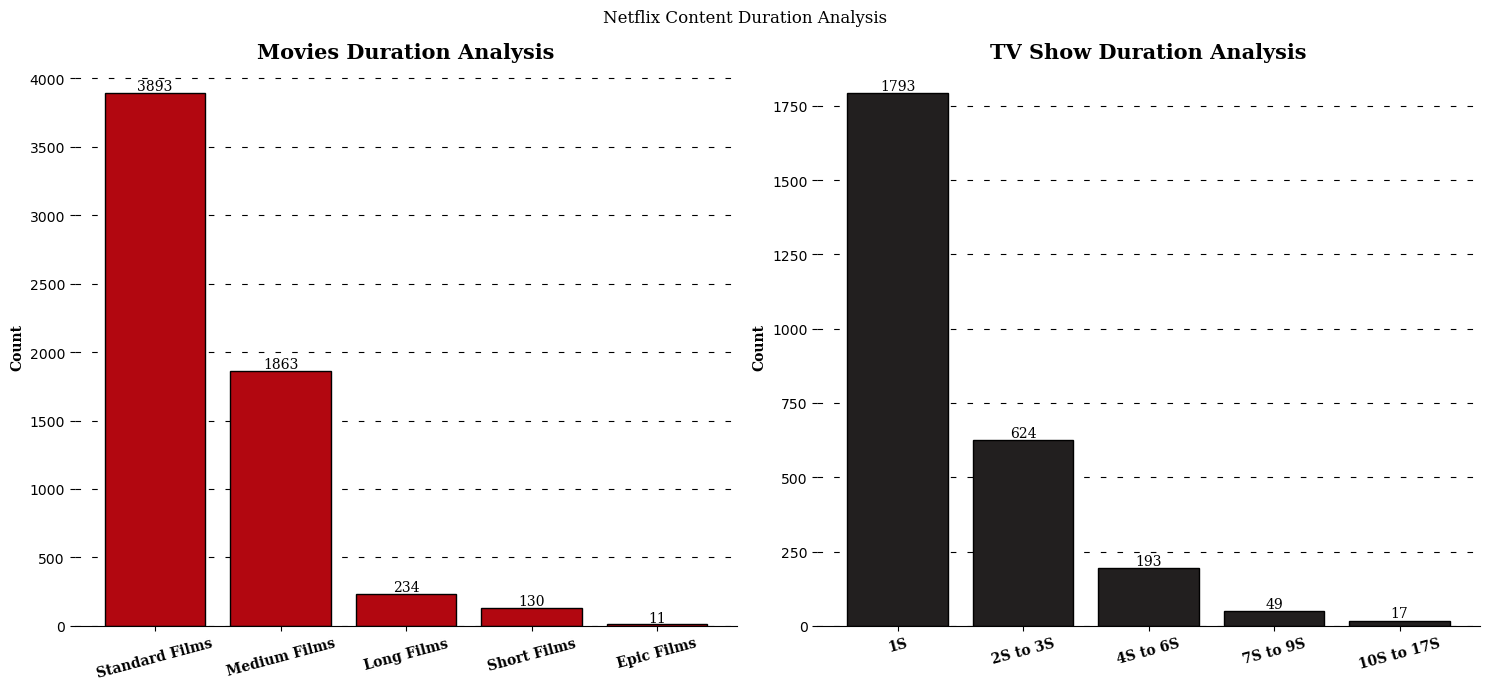

In [110]:
fig = plt.figure(figsize=(15, 7))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])

ax0.bar(
    movie_duration['Film Length'],
    height=movie_duration['Count'],
    edgecolor='black',
    color='#b20710',
    zorder=2
)

for i in movie_duration.index:
    film_type = movie_duration.loc[i, 'Film Length']
    count_value = movie_duration.loc[i, 'Count']
    
    ax0.text(
        film_type,
        count_value + 50,
        int(count_value),
        fontdict={'font': 'serif', 'size': 10},
        ha='center',
        va='center'
    )

ax0.grid(
    color='black',
    linestyle='--',
    axis='y',
    zorder=0,
    dashes=(5, 10)
)

ax0.set_xticklabels(
    movie_duration['Film Length'],
    fontweight='bold',
    fontfamily='serif',
    rotation=15
)

ax0.set_ylabel('Count', fontweight='bold', fontfamily='serif')

for spine in ['top', 'left', 'right']:
    ax0.spines[spine].set_visible(False)

ax0.set_title(
    'Movies Duration Analysis',
    fontdict={'font': 'serif', 'size': 15, 'weight': 'bold'}
)

ax1 = fig.add_subplot(gs[0, 1])

ax1.bar(
    tv_duration['Season'],
    height=tv_duration['Count'],
    edgecolor='black',
    color='#221f1f',
    zorder=2
)

for i in tv_duration.index:
    season_type = tv_duration.loc[i, 'Season']
    count_value = tv_duration.loc[i, 'Count']
    
    ax1.text(
        season_type,
        count_value + 25,
        int(count_value),
        fontdict={'font': 'serif', 'size': 10},
        ha='center',
        va='center'
    )

ax1.grid(
    color='black',
    linestyle='--',
    axis='y',
    zorder=0,
    dashes=(5, 10)
)

ax1.set_xticklabels(
    tv_duration['Season'],
    fontweight='bold',
    fontfamily='serif',
    rotation=15
)

ax1.set_ylabel('Count', fontweight='bold', fontfamily='serif')

for spine in ['top', 'left', 'right']:
    ax1.spines[spine].set_visible(False)

ax1.set_title(
    'TV Show Duration Analysis',
    fontdict={'font': 'serif', 'size': 15, 'weight': 'bold'}
)

fig.suptitle(
    'Netflix Content Duration Analysis',
    fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'}
)

plt.tight_layout()
plt.show()

###  Insights

**1. Movies**

- The majority of films fall under the **"Standard Films"** category,indicating that viewers prefer movies that are of typical length for a movie-watching experience.


- The higher count of **"Medium Films"** also indicates that viewers are interested in movies that are slightly longer than average, suggesting that movies with a bit more depth and storytelling might be well-received.


- The presence of **"Long Films", "Short Films" and "Epic Films"** in the content library indicates that Netflix caters to a wide range of viewer preferences.


**2. TV Shows**

-  TV shows with a **single season (1S) are the most common**, suggesting that shorter series or limited series are popular on Netflix.


- As the **season duration increases, the count of TV shows decreases**. This pattern indicates that viewers might prefer shorter series over longer ones

# 4. Business Recommendations for Netflix

Based on the Exploratory Data Analysis (EDA) of the Netflix dataset, the following insights and business recommendations can help improve Netflix’s global content strategy and audience reach.

---

## 1. Focus on Localized Content

- **Invest in region-specific content:** The data shows that different countries prefer different types of content.  
  - India prefers movies (about 92% of content).  
  - South Korea and Japan prefer TV shows (over 60%).  
  Netflix should continue creating and acquiring content that matches local preferences.

- **Collaborate with local creators:** Partnering with regional studios, directors, and actors can help Netflix produce authentic stories that appeal to local audiences.

---

## 2. Plan Smart Release Timing

- **Monthly release pattern:** Most new content is uploaded during January, July, August, October, and December — months with higher viewing activity.  
  Netflix should release major titles during these months to take advantage of high engagement.

- **Weekly release cycle:** The data shows a spike in content uploads during the first week of each month.  
  Netflix can use this week for launching major titles and use the remaining weeks for promoting and featuring existing shows.

---

## 3. Target Different Age Groups Effectively

- **Teen-focused content in Asia:** Countries like India, Japan, and South Korea have a higher percentage of teen-oriented content.  
  Netflix should develop more shows and movies for teenagers and young adults in these regions.

- **Adult-focused content in Europe and Latin America:** Spain, France, Germany, and Mexico prefer mature and adult-themed content.  
  Netflix can expand in these regions by producing high-quality thrillers, dramas, and documentaries.

---

## 4. Match Viewer Preferences for Duration

- **Shorter TV shows perform better:** Most TV shows on Netflix have only one or two seasons, suggesting that viewers prefer limited or short series.  
  Netflix should focus on creating short, high-quality mini-series and limited seasons.

- **Balanced movie lengths:** Viewers mostly watch standard-length movies but also enjoy slightly longer “medium-length” films.  
  Netflix can produce films that balance good storytelling with reasonable viewing time.

---

## 5. Optimize Content Acquisition Strategy

- **Reduce movie release delay:** Movies often appear on Netflix years after their original release, while TV shows arrive faster.  
  Reducing this delay can help Netflix offer more up-to-date movies and attract new subscribers.

- **Faster regional availability:** Countries like Spain and India prefer more recent content.  
  Netflix should focus on securing faster streaming rights for these markets to meet viewer expectations.

---

## Summary

By focusing on localized content, better release scheduling, age-based targeting, viewer-friendly durations, and faster content updates, Netflix can continue to grow its subscriber base globally while keeping audiences engaged and satisfied.
